In [2]:
%matplotlib inline
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Helper Functions
from helpers import *

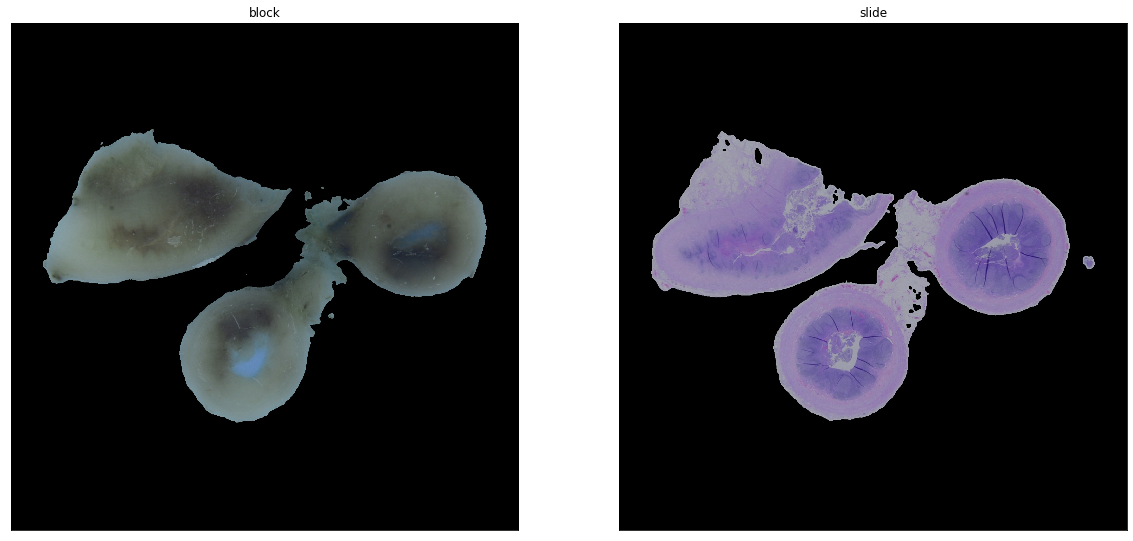

In [15]:
str_path_block = './data/img_clean/blocks_clean/'
str_file_block = '_DSC9676.JPG'
str_path_slide = './data/img_clean/slides_clean/'
str_file_slide = '_DSC9454.JPG'

image_block = cv2.cvtColor(cv2.imread(str_path_block + str_file_block), cv2.COLOR_BGR2RGB)
image_slide = cv2.cvtColor(cv2.imread(str_path_slide + str_file_slide), cv2.COLOR_BGR2RGB)

show2img('block', image_block, 'slide',image_slide)

In [11]:
def thresholding(image):
    image_thres = image.copy()
    image_thres = cv2.cvtColor(image_thres,cv2.COLOR_RGB2GRAY)
    image_thres[image_thres > 5] = 255
#     show2img('orginal', image, 'image_thres',image_thres)
    return image_thres

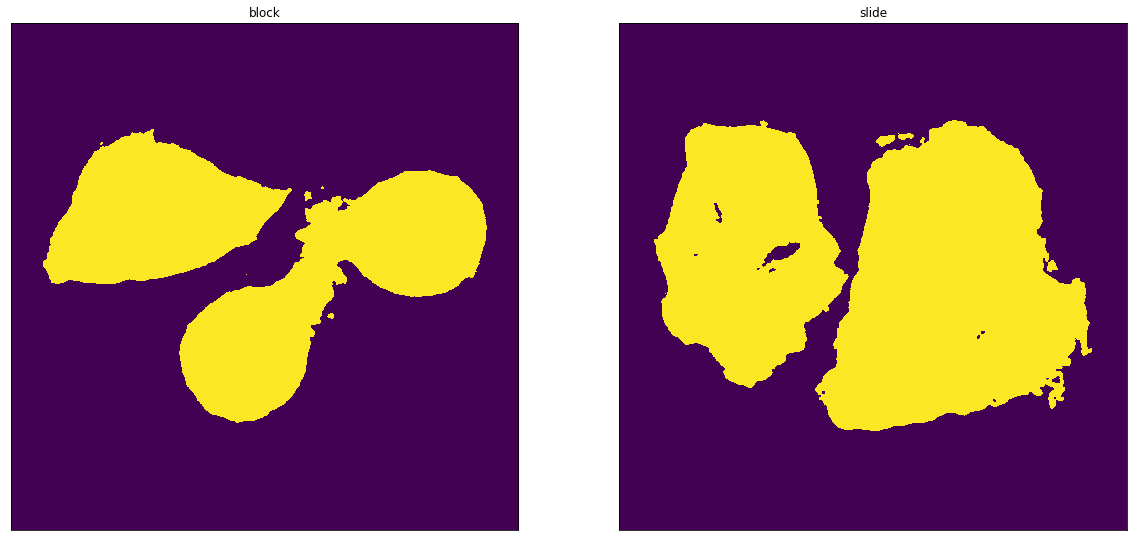

In [12]:
image_thres_block = thresholding(image_block)
image_thres_slide = thresholding(image_slide)

show2img('block', image_thres_block, 'slide',image_thres_slide)

In [13]:
from pystackreg import StackReg

ref = image_thres_block
mov = image_thres_slide

#Translational transformation
sr = StackReg(StackReg.TRANSLATION)
out_tra = sr.register_transform(ref, mov)

#Rigid Body transformation
sr = StackReg(StackReg.RIGID_BODY)
out_rot = sr.register_transform(ref, mov)

#Scaled Rotation transformation
sr = StackReg(StackReg.SCALED_ROTATION)
out_sca = sr.register_transform(ref, mov)

#Affine transformation
sr = StackReg(StackReg.AFFINE)
out_aff = sr.register_transform(ref, mov)

#Bilinear transformation
sr = StackReg(StackReg.BILINEAR)
out_bil = sr.register_transform(ref, mov)

# out_tra = out_tra.astype(np.uint8)
# out_rot = out_rot.astype(np.uint8)
# out_sca = out_sca.astype(np.uint8)
# out_aff = out_aff.astype(np.uint8)
# out_bil = out_bil.astype(np.uint8)

In [14]:
cv2.imwrite('./img_clean/blocks_thres/'+str_file_block, image_thres_block)
cv2.imwrite('./img_clean/slides_thres/'+str_file_slide, mov)

False